In [ ]:
# pip install git+https://github.com/forTEXT/gitma

In [ ]:
#from gitma import CatmaProject
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime
from scipy.stats import gaussian_kde
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from matplotlib.ticker import FuncFormatter

### Catma annotation data preprocess

In [ ]:
# Use Gitma package to access CATMA annotation data
my_project = CatmaProject(
    project_name='Movie EvENT',
    gitlab_access_token='******',
    load_from_gitlab=True
)

In [ ]:
# 500 Days of Summer(2009)

# Use Gitma package to download annotation data from CATMA
anno_500days_df = my_project.ac_dict['2009_500_days_of_summer_annotator2'].df

# Preprocess and save original data
anno_500days_df['text_length'] = anno_500days_df['end_point']-anno_500days_df['start_point']
anno_500days_df1 = anno_500days_df.loc[anno_500days_df['annotator']=='annotator2']\
                                 .reset_index()
anno_500days_df1.to_csv('anno_500days.csv',encoding='utf_8_sig')

# Calculate IAA score(Krippendorf's Alpha)
my_project.get_iaa(
    ac1_name='2009_500_days_of_summer_annotator3',
    ac2_name='2009_500_days_of_summer_annotator2',
    tag_filter=['process', 'change_of_state', 'non_event', 'stative_event'],
)


Finished search for overlapping annotations in:
- 2009_500_days_of_summer_Jane
- 2009_500_days_of_summer_Marina
Could match 76 annotations.
Average overlap is 90.38 %.
Couldn't match 0 annotation(s) in first annotation collection.


Results for "tag"
-----------------
Scott's Pi:          0.9292364990689014
Cohen's Kappa:       0.9293023255813955
Krippendorf's Alpha: 0.9297020484171322

Confusion Matrix
                -------



,change_of_state,non_event,process,stative_event
change_of_state,11,0,0,0
non_event,0,1,0,0
process,0,0,58,0
stative_event,0,0,2,4


In [ ]:
anno_TSN_df = my_project.ac_dict['2010_the_social_network_annotator2'].df

anno_TSN_df['text_length'] = anno_TSN_df['end_point']-anno_TSN_df['start_point']
anno_TSN_df1 = anno_TSN_df.loc[anno_TSN_df['annotator']=='annotator2'].reset_index()
anno_TSN_df1.to_csv('anno_TSN.csv',encoding='utf_8_sig')

my_project.get_iaa(
    ac1_name='2010_the_social_network_annotator4',
    ac2_name='2010_the_social_network_annotator2',
    tag_filter=['process', 'change_of_state', 'non_event', 'stative_event'],
)


Finished search for overlapping annotations in:
- 2010_the_social_network_Aris
- 2010_the_social_network_Marina
Could match 75 annotations.
Average overlap is 89.33 %.
Couldn't match 0 annotation(s) in first annotation collection.


Results for "tag"
-----------------
Scott's Pi:          0.6634675308488097
Cohen's Kappa:       0.6665843418127934
Krippendorf's Alpha: 0.665711080643151

Confusion Matrix
                -------



,change_of_state,non_event,process,stative_event
change_of_state,22,0,2,2
non_event,0,5,0,1
process,4,5,18,3
stative_event,0,1,0,12


In [ ]:
# Flight(2012)

# Use Gitma package to download annotation data from CATMA
anno_flight_df = my_project.ac_dict['2012_flight_annotator2'].df
anno_flight_df['text_length'] = anno_flight_df['end_point']-anno_flight_df['start_point']

# Preprocess and save original data
anno_flight_df1 = anno_flight_df.loc[anno_flight_df['annotator']=='annotator2'].reset_index()
anno_flight_df1.to_csv('anno_flight.csv',encoding='utf_8_sig')

# Calculate IAA score(Krippendorf's Alpha)
my_project.get_iaa(
    ac1_name='2012_flight_annotator1',
    ac2_name='2012_flight_annotator2'
)


Finished search for overlapping annotations in:
- 2012_flight_Pan
- 2012_flight_Marina
Could match 66 annotations.
Average overlap is 90.38 %.
Couldn't match 0 annotation(s) in first annotation collection.


Results for "tag"
-----------------
Scott's Pi:          0.8344620015048908
Cohen's Kappa:       0.8346693386773546
Krippendorf's Alpha: 0.8357160772510659

Confusion Matrix
                -------



,change_of_state,non_event,process,stative_event
change_of_state,10,1,1,0
non_event,0,2,1,0
process,0,1,45,0
stative_event,0,0,1,4


### Manually extracted events compared with machine learning extracted events

#### Import manually aligned manually extracted events and ml extracted events from m-vad datast
#### Preprocess data


In [ ]:
# Import data from 3 movies
ts_500_df = pd.read_csv('AllEvents_500Days.csv')
ts_flight_df = pd.read_csv('All_Event_Flight.csv')
ts_TSN_df = pd.read_csv('AllEvent_TSN.csv')

In [ ]:
# Process the time data and change it into '%H:%M:%S' format
ts_500_df['Start'] = pd.to_datetime(ts_500_df['Start'], format='%H:%M:%S')
ts_500_df['End'] = pd.to_datetime(ts_500_df['End'], format='%H:%M:%S')

ts_TSN_df['Start'] = pd.to_datetime(ts_TSN_df['Start'], format='%H:%M:%S')
ts_TSN_df['End'] = pd.to_datetime(ts_TSN_df['End'], format='%H:%M:%S')

ts_flight_df['Start'] = pd.to_datetime(ts_flight_df['Start'], format='%H:%M:%S')
ts_flight_df['End'] = pd.to_datetime(ts_flight_df['End'], format='%H:%M:%S')

In [ ]:
# Preprocess data

# This movie summary sentences were all aligned with clips in the movie
ts_TSN_df_success = ts_TSN_df.loc[ts_TSN_df['Aligned']=='Success']
ts_TSN_df_manual = ts_TSN_df.loc[ts_TSN_df['ExtractionType']=='Manually Extracted Event']
ts_TSN_df_ml = ts_TSN_df.loc[ts_TSN_df['ExtractionType']=='Machine Learning Extracted Event']

# drop0: remove the annotation sentences which were not aligned with clips in the movie
ts_500_df_success = ts_500_df.loc[ts_500_df['Aligned']=='Success']
ts_500_df_manual = ts_500_df.loc[ts_500_df['ExtractionType']=='Manually Extracted Event']
ts_500_df_ml = ts_500_df.loc[ts_500_df['ExtractionType']=='Machine Learning Extracted Event']
ts_500_drop0_m = ts_500_df_manual.drop(
    ts_500_df_manual[ts_500_df_manual['Duration(s)'] == 0].index
)

# drop0: remove the annotation sentences which were not alligned with clips in the movie
ts_flight_df_success = ts_flight_df.loc[ts_flight_df['Aligned']=='Success']
ts_flight_df_manual = ts_flight_df.loc[
    ts_flight_df['ExtractionType'] == 'Manually Extracted Event'
]
ts_flight_df_ml = ts_flight_df.loc[
    ts_flight_df['ExtractionType']=='Machine Learning Extracted Event'
]
ts_flight_drop0_m = ts_flight_df_manual.drop(
    ts_flight_df_manual[ts_flight_df_manual['Duration(s)']==0].index
)

### Time duration comparison between manually and ML extracted events


In [ ]:
# Plot time duration distribution and comparison plot

def plot_duration_comparison(ml_data, anno_data, movie_name):
    # Create a canvas and subplot
    fig, ax = plt.subplots(figsize=(5, 5))

    # Plot a scatterplot, swapping x and y positions
    ax.scatter(ml_data, [1]*len(ml_data), color='orange', marker='o', 
               label='ML Extracted Events', alpha=0.5)
    ax.scatter(anno_data, [2]*len(anno_data), color='blue', marker='o', 
               label='Manually Annotated Events', alpha=0.5)

    # Plot a boxplot
    median_line_color = 'green'
    box_plot_data = [ml_data, anno_data]
    ax.boxplot(box_plot_data, vert=False, medianprops={'color': median_line_color}, 
               showfliers=False)

    # Set range and labels for y-axis ticks
    ax.set_ylim(0.5, 2.5)
    ax.set_yticks([1, 2])
    ax.set_yticklabels(['Machine Learning', 'Annotation'])

    # Sets the x-axis to a base-2 logarithmic scale
    ax.set_xscale('log', base=2)

    # Custom x-axis tick labels
    def x_tick_formatter(x, pos):
        return str(int(x))
    ax.xaxis.set_major_formatter(FuncFormatter(x_tick_formatter))

    # Set the density of the x-axis ticks
    ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])

    # Set titles on the x and y-axis
    ax.set_xlabel('Seconds (s)')
    ax.set_ylabel('')

    # Set Movie_Name at the top of the plot
    ax.set_title(movie_name, loc='center', pad=10)

    # Move the legend inside the plot
    ax.legend(loc='upper left', frameon=False)

    plt.show()

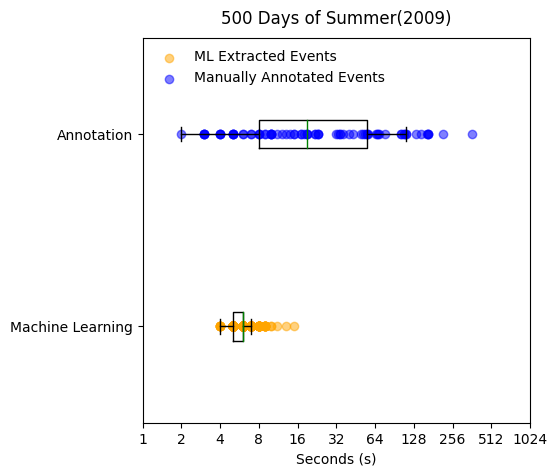

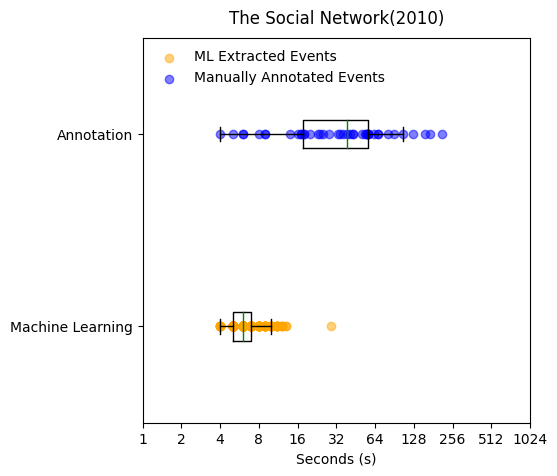

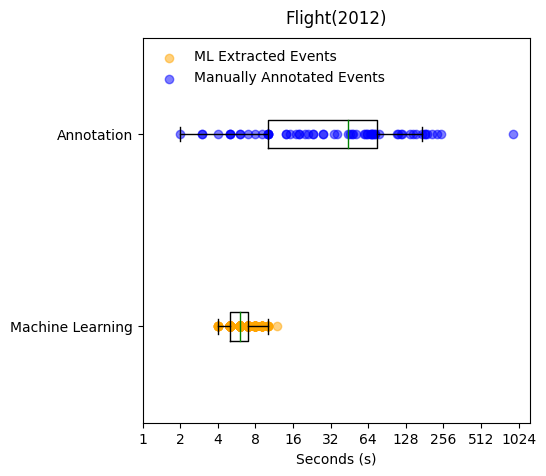

In [ ]:
# Plot time duration distribution comparison plot

Machine_Learnig_500 = ts_500_df_ml['Duration(s)'].tolist()
Anno_500 = ts_500_drop0_m['Duration(s)'].tolist()
Movie_Name = "500 Days of Summer(2009)"
plot_duration_comparison(Machine_Learnig_500, Anno_500, Movie_Name)

Machine_Learnig_tsn = ts_TSN_df_ml['Duration(s)'].tolist()
Anno_tsn = ts_TSN_df_manual['Duration(s)'].tolist()
Movie_Name = "The Social Network(2010)"
plot_duration_comparison(Machine_Learnig_tsn, Anno_tsn, Movie_Name)

Machine_Learnig_flight = ts_flight_df_ml['Duration(s)'].tolist()
Anno_flight = ts_flight_drop0_m['Duration(s)'].tolist()
Movie_Name = "Flight(2012)"
plot_duration_comparison(Machine_Learnig_flight, Anno_flight, Movie_Name)

In [ ]:
# Calculate min, max time duration and std of time duration
duration_500_manual = ts_500_drop0_m['Duration(s)'].describe()
duration_500_ml = ts_500_df_ml['Duration(s)'].describe()
duration_tsn_manual = ts_TSN_df_manual['Duration(s)'].describe()
duration_tsn_ml = ts_TSN_df_ml['Duration(s)'].describe()
duration_flight_manual = ts_flight_drop0_m['Duration(s)'].describe()
duration_flight_ml = ts_flight_df_ml['Duration(s)'].describe()

In [ ]:
print("\n500days_manual:\n", duration_500_manual)
print("\n500days_ml:\n", duration_500_ml)
print()
print("\ntsn_manual:\n", duration_tsn_manual)
print("\ntsn_ml:\n", duration_tsn_ml)
print()
print("\nflight_manual:\n", duration_flight_manual)
print("\nflight_ml:\n", duration_flight_ml)


500days_manual:
 count     78.000000
mean      45.576923
std       61.406992
min        2.000000
25%        8.000000
50%       19.000000
75%       55.750000
max      364.000000
Name: Duration(s), dtype: float64

500days_ml:
 count    436.000000
mean       6.032110
std        1.216317
min        4.000000
25%        5.000000
50%        6.000000
75%        6.000000
max       15.000000
Name: Duration(s), dtype: float64


tsn_manual:
 count     43.000000
mean      48.976744
std       45.630758
min        4.000000
25%       17.500000
50%       39.000000
75%       56.000000
max      210.000000
Name: Duration(s), dtype: float64

tsn_ml:
 count    260.000000
mean       6.576923
std        2.294413
min        4.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       29.000000
Name: Duration(s), dtype: float64


flight_manual:
 count     63.000000
mean      74.412698
std      126.317653
min        2.000000
25%       10.000000
50%       44.000000
75%       75.500000
max      

### Time length comparison between manually and ML extracted events

#### Time length comparison between all manually and ML extracted movie events 

In [ ]:
def create_allevents_timeline_plot(data, movie_name):
    pio.templates.default = "simple_white"
    fig = px.timeline(data, x_start="Start", x_end="End", y="ExtractionType", 
                      color="ExtractionType", title=f"All Extracted Events - {movie_name}")
    fig.update_xaxes(
        tickformat="%H:%M:%S",
        title='Timespan',
    )
    fig.show()

movie_name_500 = '500 Days of Summer(2009)'
movie_name_tsn = 'The Social Network(2010)'
movie_name_flight = 'Flight(2012)'
create_allevents_timeline_plot(ts_500_df, movie_name_500)
create_allevents_timeline_plot(ts_TSN_df, movie_name_tsn)
create_allevents_timeline_plot(ts_flight_df, movie_name_flight)

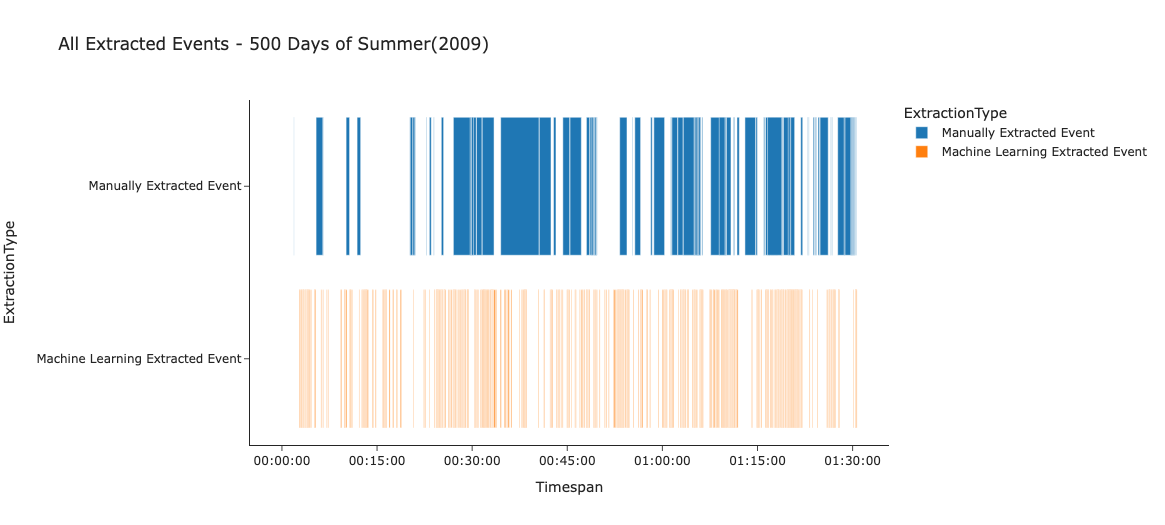

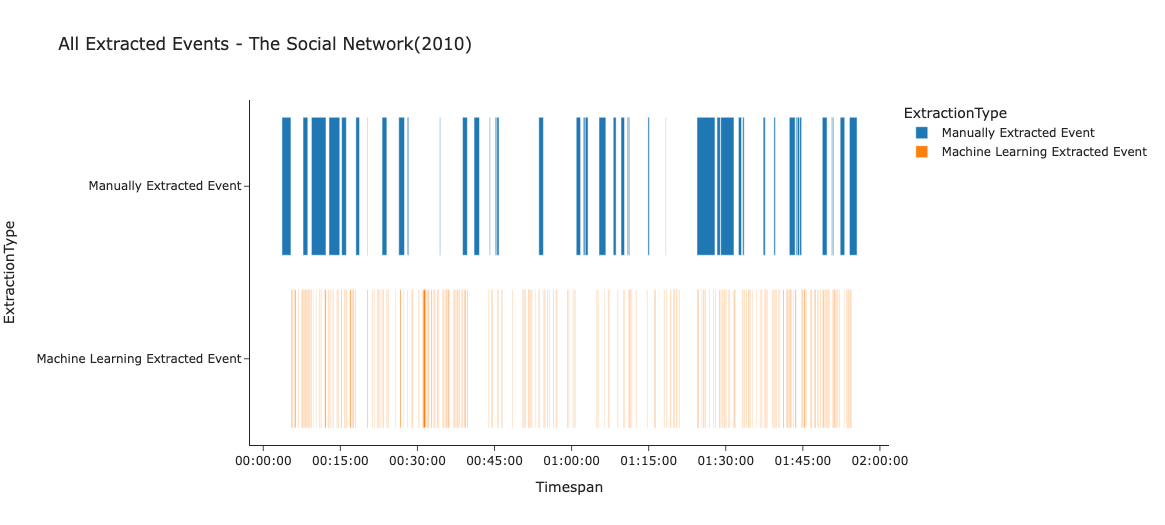

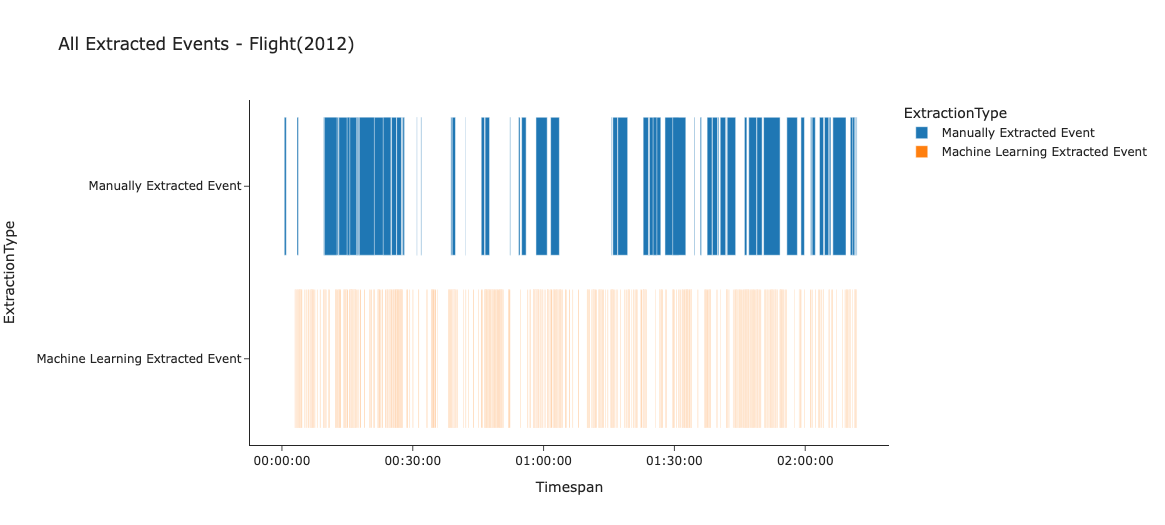

#### Time length comparison between all successfully alligned manually and ML extracted movie events 

In [ ]:
def create_aligned_timeline_plot(data, movie_name):
    pio.templates.default = "simple_white"
    fig = px.timeline(data, x_start="Start", x_end="End", y="ExtractionType", 
                      color="ExtractionType", 
                      title=f"Successfully Aligned Events - {movie_name}")
    fig.update_xaxes(
        tickformat="%H:%M:%S",
        title='Timespan'
    )
    fig.show()

create_aligned_timeline_plot(ts_500_df_success, movie_name_500)
create_aligned_timeline_plot(ts_TSN_df_success, movie_name_tsn)
create_aligned_timeline_plot(ts_flight_df_success, movie_name_flight)

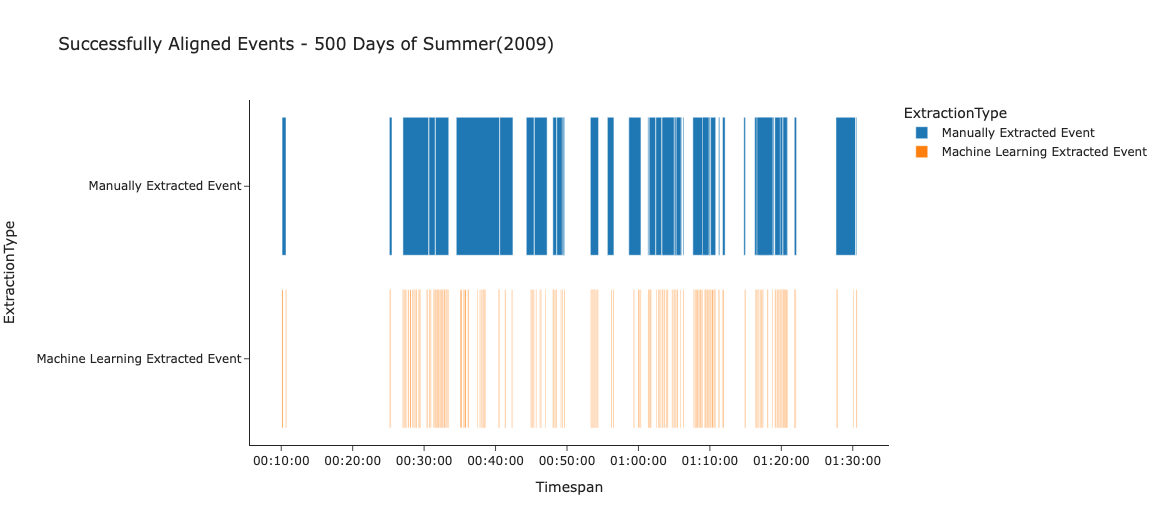

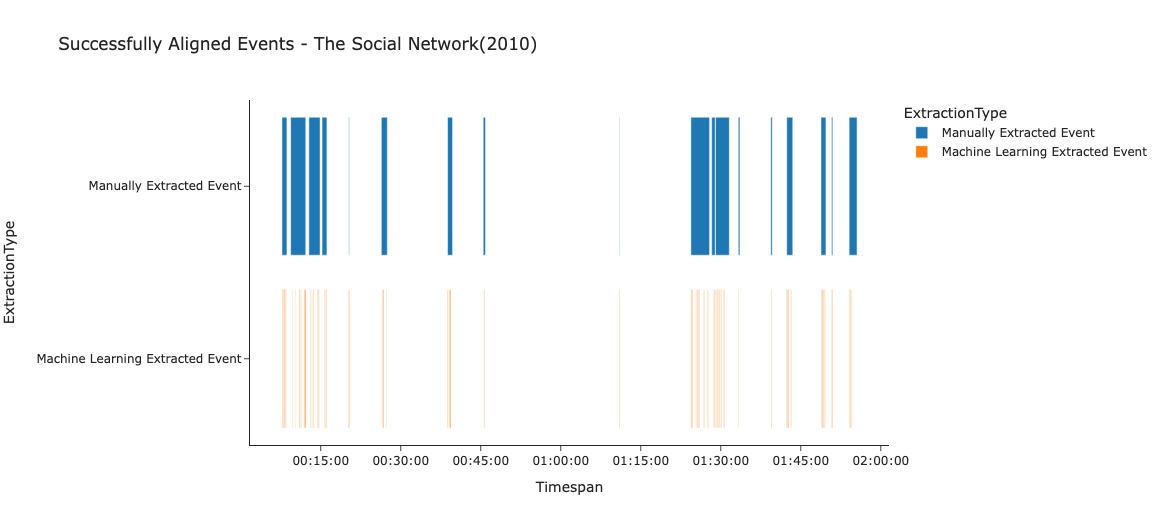

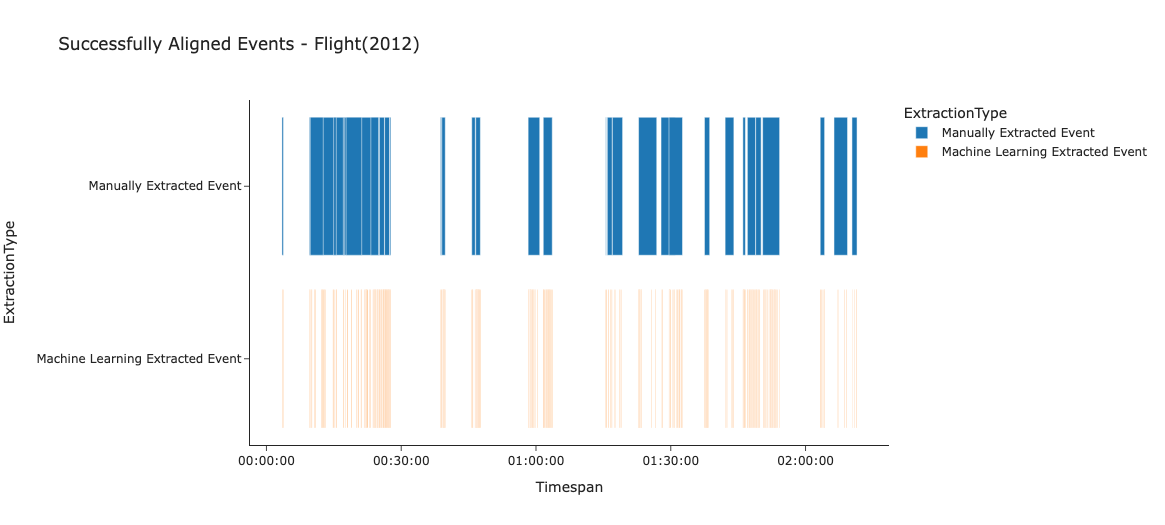

#### Time length comparison between successfully and failed alligned ML extracted movie events

In [ ]:
def create_ml_timeline_plot(data, movie_name):
    pio.templates.default = "simple_white"
    fig = px.timeline(data, x_start="Start", x_end="End", y="Aligned", color="Aligned", 
                      title=f"Machine Learning Extracted Events - {movie_name}")
    fig.update_xaxes(
        tickformat="%H:%M:%S",
        title='Timespan'
    )
    fig.show()

create_ml_timeline_plot(ts_500_df_ml, movie_name_500)
create_ml_timeline_plot(ts_TSN_df_ml, movie_name_tsn)
create_ml_timeline_plot(ts_flight_df_ml, movie_name_flight)

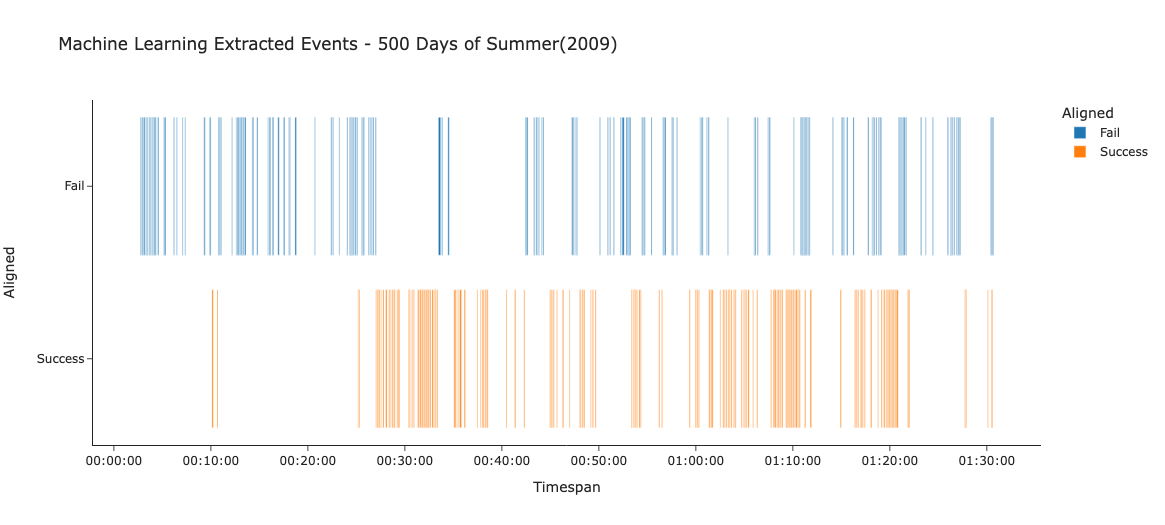

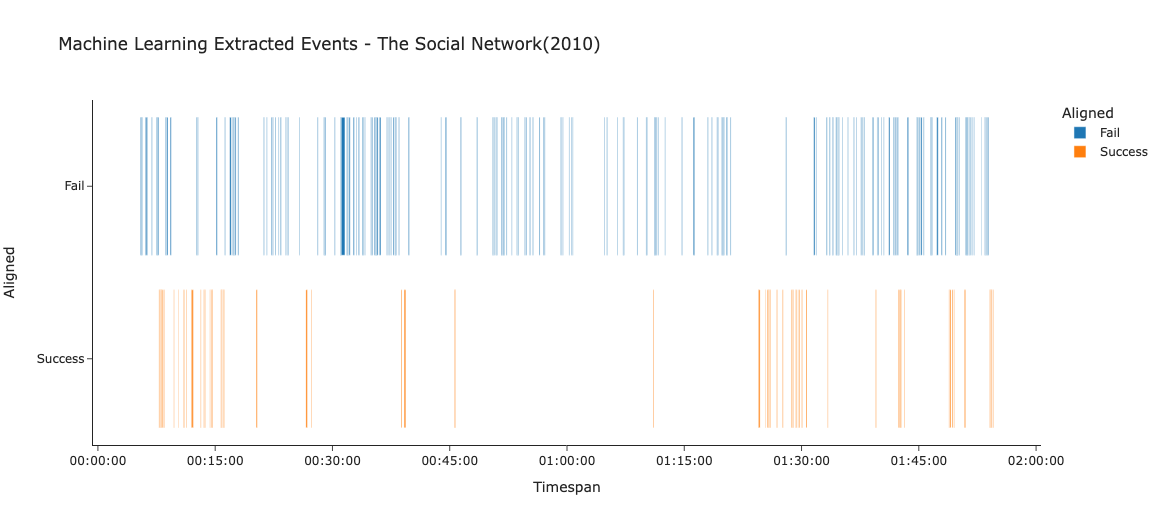

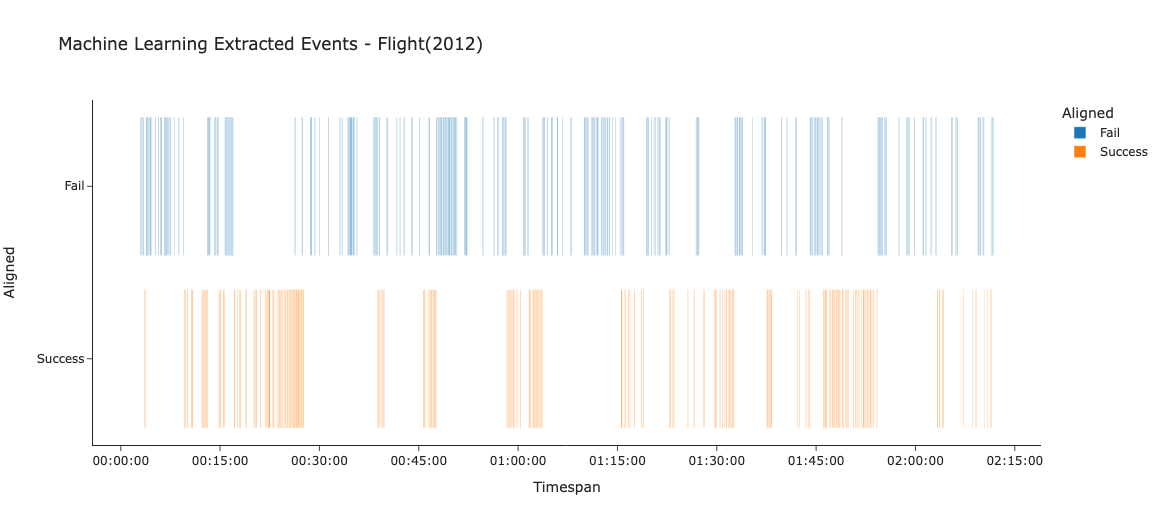

#### Time length and event type comparison between successfully and failed alligned manually extracted movie events

In [ ]:
def create_type_timeline_plot(data, movie_name):
    pio.templates.default = "simple_white"
    fig = px.timeline(data, x_start="Start", x_end="End", y="Aligned", color="EventType",
                  title=f"Manually Extracted Events(With Event Types) - {movie_name}",
                  color_discrete_map={'non_event':'mediumpurple', 'process':'orange',
                                      'stative_event':'darkgrey',
                                      'change_of_state':'dodgerblue'})
    fig.update_xaxes(
        tickformat="%H:%M:%S",
        title='Timespan'
    )
    fig.show()

create_type_timeline_plot(ts_500_df_manual, movie_name_500)
create_type_timeline_plot(ts_TSN_df_manual, movie_name_tsn)
create_type_timeline_plot(ts_flight_df_manual, movie_name_flight)

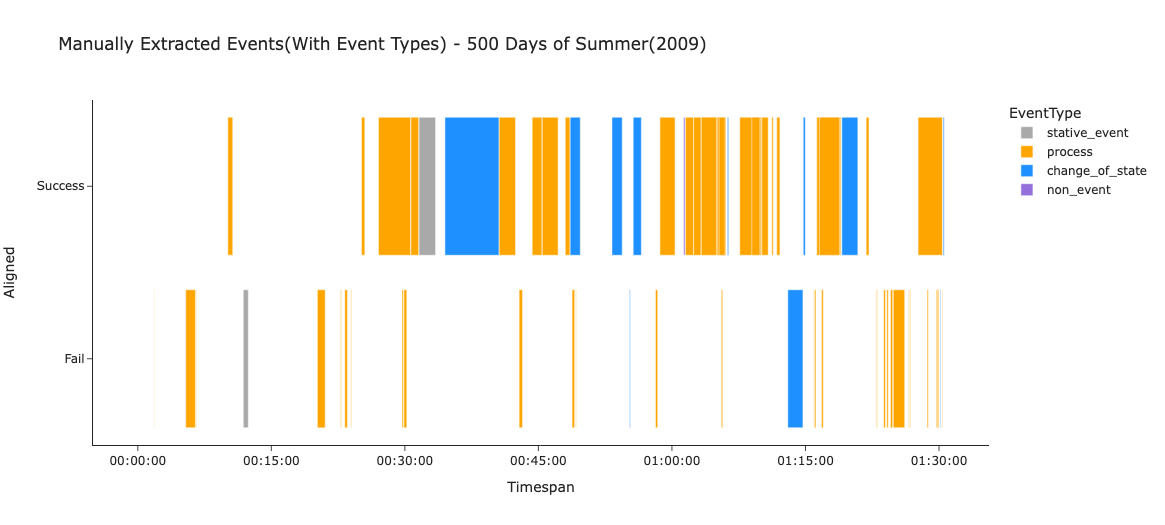

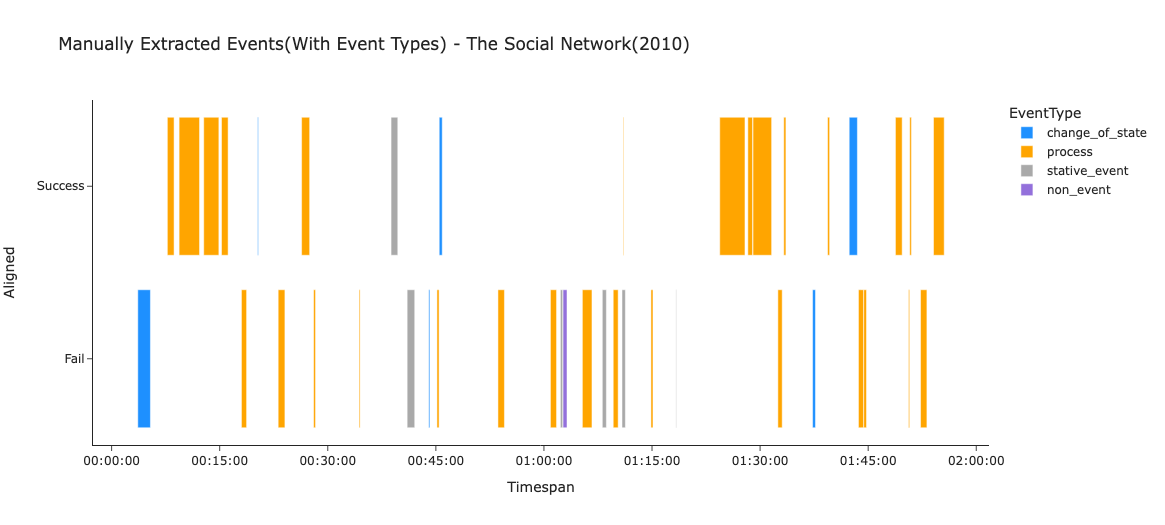

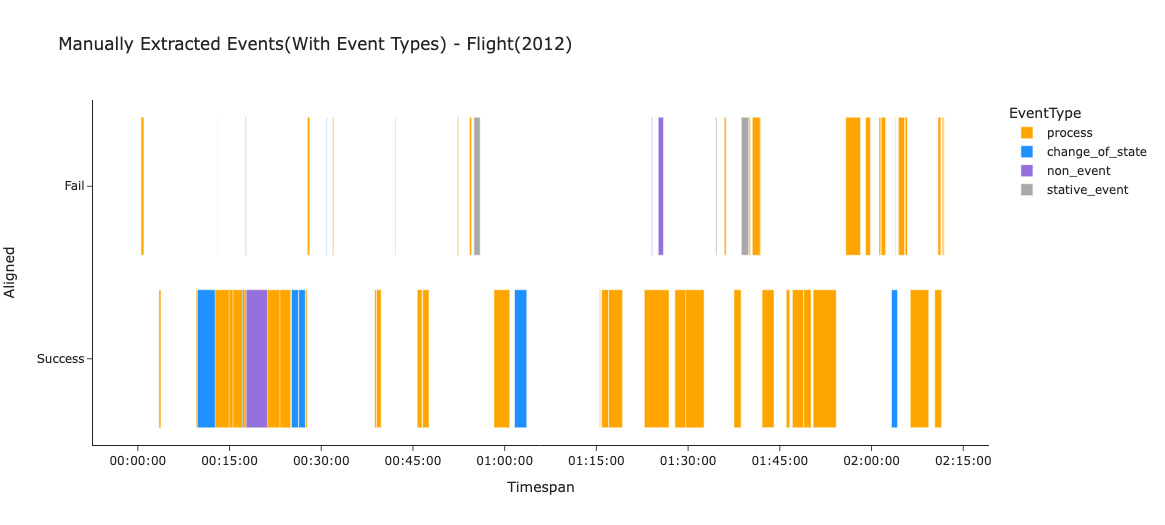